## 6.1数据集成

### 6.1.2 合并数据

### 主键合并数据
#### merge()函数：这个函数通过指定一个或多个键对两组数据进行连接，通常以两组数据中重复的列索引作为合并键
#### 支持4种连接方式，分别是内连接 左外连接 右外连接 全外连接

In [1]:
import pandas as pd
df_left = pd.DataFrame({'key':['K0','K1','K2'],
                             'A':['A0','A1','A2'],
                             'B':['B0','B1','B2']})
df_right = pd.DataFrame({'key':['K0','K1','K2','K3'],
                              'C':['C0','C1','C2','C3'],
                              'D':['D0','D1','D2','D3']})
print(df_left)
print(df_right)
# 以key为主键，采用内连接的方式合并数据
result = pd.merge(df_left, df_right, on='key')
print(result)

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3
  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2


In [2]:
# 以key为主键，采用左外连接的方式合并数据
result = pd.merge(df_left, df_right, on='key', how='left')
print(result)

  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2


In [3]:
# 以key为主键，采用右外连接的方式合并数据
result = pd.merge(df_left, df_right, on='key', how='right')
print(result)

  key    A    B   C   D
0  K0   A0   B0  C0  D0
1  K1   A1   B1  C1  D1
2  K2   A2   B2  C2  D2
3  K3  NaN  NaN  C3  D3


In [4]:
# 以key为主键，采用全外连接的方式合并数据
result = pd.merge(df_left, df_right, on='key', how='outer')
print(result)

  key    A    B   C   D
0  K0   A0   B0  C0  D0
1  K1   A1   B1  C1  D1
2  K2   A2   B2  C2  D2
3  K3  NaN  NaN  C3  D3


### 堆叠合并数据
#### 使用concat()函数  沿着某个轴对多个对象进行连接   支持内连接和外连接

In [5]:
# 采用外连接方式，沿行方向合并数据   即纵向拼接 将left和right上下拼接
result = pd.concat([df_left, df_right], axis=0)
print(result)

  key    A    B    C    D
0  K0   A0   B0  NaN  NaN
1  K1   A1   B1  NaN  NaN
2  K2   A2   B2  NaN  NaN
0  K0  NaN  NaN   C0   D0
1  K1  NaN  NaN   C1   D1
2  K2  NaN  NaN   C2   D2
3  K3  NaN  NaN   C3   D3


In [2]:
# 采用外连接方式，沿列方向合并数据    即横向拼接  将left和right左右拼接
result = pd.concat([df_left, df_right], axis=1)
print(result)

   key    A    B key   C   D
0   K0   A0   B0  K0  C0  D0
1   K1   A1   B1  K1  C1  D1
2   K2   A2   B2  K2  C2  D2
3  NaN  NaN  NaN  K3  C3  D3


#### 重叠合并数据
#### combine_first()方法：将一组数据的空值填充为另一组数据中对应位置的值

In [5]:
import numpy as np
from numpy import NAN
import pandas as pd
df_left = pd.DataFrame({'A': [np.nan, 'A1', 'A2', 'A3'],
                             'B': [np.nan, 'B1', np.nan, 'B3'],
                             'C': ['C0', 'C1', 'C2', 'C3']})    #没有额外表示index   默认为0 1 2
df_right = pd.DataFrame({'A': ['A1', 'A0','A2'],
                              'B': ['B1', 'B0','B2']}, index=[1,0,2])     #index表示对序列号进行编辑
print(df_left)
print(df_right)
# 采用重叠合并的方式组合数据
result = df_left.combine_first(df_right)
print(result)

     A    B   C
0  NaN  NaN  C0
1   A1   B1  C1
2   A2  NaN  C2
3   A3   B3  C3
    A   B
1  A1  B1
0  A0  B0
2  A2  B2
    A   B   C
0  A0  B0  C0
1  A1  B1  C1
2  A2  B2  C2
3  A3  B3  C3


### 6.2.2 轴向旋转
#### pivot()方法

In [6]:
import pandas as pd
df_obj =  pd.DataFrame({'商品名称': ['荣耀9X','小米6x','OPPO A1',
                                    '荣耀9X','小米6x','OPPO A1'],
                        '出售日期': ['5月25日', '5月25日','5月25日',
                                        '6月18日','6月18日', '6月18日'],
                          '价格(元)': [999, 1399, 1399, 800, 1200, 1250]})
df_obj

,商品名称,出售日期,价格(元)
0,荣耀9X,5月25日,999
1,小米6x,5月25日,1399
2,OPPO A1,5月25日,1399
3,荣耀9X,6月18日,800
4,小米6x,6月18日,1200
5,OPPO A1,6月18日,1250


In [8]:
# 将出售日期一列的唯一数据变换为行索引 使用index属性，商品一列的唯一数据变换为列索引  使用columns属性 ，指定DataFrame中的数据  使用values属性
new_df = df_obj.pivot(index='出售日期', columns='商品名称', 
values='价格(元)')
new_df

商品名称,OPPO A1,小米6x,荣耀9X
出售日期,,,
5月25日,1399,1399,999
6月18日,1250,1200,800


#### melt()方法   该方法是pivot方法的逆方法 用于将dataframe类对象的列索引转换为一行数据

In [16]:
#查看new_df的列索引
print(new_df.columns)
# 将列索引转换为一行数据
new_df.melt(value_name='价格(元)', ignore_index=False)
#或者使用列索引 
#new_df.melt(value_vars=['OPPO A1', '小米6x', '荣耀9X'],value_name='价格(元)', ignore_index=False)

Index(['OPPO A1', '小米6x', '荣耀9X'], dtype='object', name='商品名称')


,商品名称,价格(元)
出售日期,,
5月25日,OPPO A1,1399
6月18日,OPPO A1,1250
5月25日,小米6x,1399
6月18日,小米6x,1200
5月25日,荣耀9X,999
6月18日,荣耀9X,800


### 6.2.3 分组与聚合

#### 1.分组操作

In [17]:
#groupby()方法：根据键将原数据拆分成若干个分组，返回一个可迭代对象
import pandas as pd
df_obj = pd.DataFrame({"key":["C", "B", "C", "A", "B", "B", "A", "C", "A"], 
                       "data":[2, 4, 6, 8, 10, 1, 3, 5, 7]})
print(df_obj)
# 根据key列对df_obj进行分组
groupby_obj = df_obj.groupby(by="key")
print(groupby_obj)   #此处返回的是一个可迭代对象DataFrameGroupBy

  key  data
0   C     2
1   B     4
2   C     6
3   A     8
4   B    10
5   B     1
6   A     3
7   C     5
8   A     7


In [12]:
for group in groupby_obj:  # 遍历DataFrameGroupBy类的对象
    print(group)

('A',   key  data
3   A     8
6   A     3
8   A     7)
('B',   key  data
1   B     4
4   B    10
5   B     1)
('C',   key  data
0   C     2
2   C     6
7   C     5)


In [18]:
#只输出每个分组的信息
#利用列表推导式将列表转换为字典   字典的键即为列表中的第一个元素  值为列表中的第二个元素
result = dict([x for x in groupby_obj])['A']   #先使用列表推导式遍历groupby_obj  随后强制转换为字典  再通过访问字典的方式获取每个分组的信息
print(result)

  key  data
3   A     8
6   A     3
8   A     7


#### 2.聚合操作

In [ ]:
#1.使用内置的统计方法实现聚合操作
#2.使用agg()方法：可以接受内置的统计方法，也可以接受自定义的函数，同时运用多个统计方法或者函数，还可以对每一列使用不同的统计方法或者函数
#3.使用transform()方法：可以接收内置的统计方法，也可以接收自定义的函数，同时可使聚合前和聚合后的数据结构保持一致
#4.使用apply()方法：可以接收内置的统计方法，也可以接收自定义的函数。

In [14]:
#使用内置的统计方法实现聚合操作
print(groupby_obj.max())   # 使用max()方法聚合分组数据

     data
key      
A       8
B      10
C       6


In [24]:
from pandas import DataFrame
df_obj = DataFrame({'a': [0, 6, 12, 18, 24, 30],
                       'b': [1, 7, 13, 19, 25, 31],
                       'c': [2, 8, 14, 20, 26, 32],
                       'd': [3, 9, 15, 21, 27, 33],
                       'e': [4, 10, 16, 22, 28, 34],
                       'f': [5, 11, 17, 23, 29, 35]})
print(df_obj)

    a   b   c   d   e   f
0   0   1   2   3   4   5
1   6   7   8   9  10  11
2  12  13  14  15  16  17
3  18  19  20  21  22  23
4  24  25  26  27  28  29
5  30  31  32  33  34  35


In [25]:
# 根据列表对df_obj进行分组，列表中相同元素对应的行会归为一组
groupby_obj = df_obj.groupby(by=['A', 'A', 'B', 'B', 'A', 'B'])
#查看A组中的数据
dict([x for x in groupby_obj])['A']   #根据设定的AABBAB分组   将行索引为0.1.4的行进行归类

,a,b,c,d,e,f
0,0,1,2,3,4,5
1,6,7,8,9,10,11
4,24,25,26,27,28,29


In [27]:
#查看B组中的数据
dict([x for x in groupby_obj])['B']   #根据设定的AABBAB分组   将行索引为2.3.5的行进行归类

,a,b,c,d,e,f
2,12,13,14,15,16,17
3,18,19,20,21,22,23
5,30,31,32,33,34,35


In [26]:
# 自定义求极差的函数
def my_range(arr):
    return arr.max()-arr.min()
groupby_obj.agg(my_range)  # 使用agg()方法聚合分组数据

,a,b,c,d,e,f
A,24,24,24,24,24,24
B,18,18,18,18,18,18


In [17]:
# 使用agg()方法聚合分组中指定列的数据   a列最大值  b列的和   e列的极差
groupby_obj.agg({'a':'max', 'c':'sum', 'e': my_range})

,a,c,e
A,24,36,24
B,30,66,18


In [29]:
#使用transform()方法聚合分组数据
from pandas import DataFrame
df_obj = DataFrame({'a': [0, 6, 12, 18, 24, 30],
                       'b': [1, 7, 13, 19, 25, 31],
                       'c': [2, 8, 14, 20, 26, 32],
                       'd': [3, 9, 15, 21, 27, 33],
                       'e': [4, 10, 16, 22, 28, 34],
                       'f': [5, 11, 17, 23, 29, 35]})
print(df_obj)
# 根据列表对df_obj进行分组，列表中相同元素对应的行会归为一组
groupby_obj = df_obj.groupby(by=['A', 'A', 'B', 'B', 'A', 'B'])
# 使用transform()方法聚合分组数据
print(groupby_obj.transform('max'))

    a   b   c   d   e   f
0   0   1   2   3   4   5
1   6   7   8   9  10  11
2  12  13  14  15  16  17
3  18  19  20  21  22  23
4  24  25  26  27  28  29
5  30  31  32  33  34  35
    a   b   c   d   e   f
0  24  25  26  27  28  29
1  24  25  26  27  28  29
2  30  31  32  33  34  35
3  30  31  32  33  34  35
4  24  25  26  27  28  29
5  30  31  32  33  34  35


In [30]:
#使用自定义的极差函数来聚合数据
print(groupby_obj.transform(my_range))

    a   b   c   d   e   f
0  24  24  24  24  24  24
1  24  24  24  24  24  24
2  18  18  18  18  18  18
3  18  18  18  18  18  18
4  24  24  24  24  24  24
5  18  18  18  18  18  18


In [19]:
# 在apply方法中使用自定义函数聚合数据，用于计算每个数据除以100的结果
def div_hun(df):
    return df.iloc[:, :] / 100
print(groupby_obj.apply(div_hun))

      a     b     c     d     e     f
0  0.00  0.01  0.02  0.03  0.04  0.05
1  0.06  0.07  0.08  0.09  0.10  0.11
2  0.12  0.13  0.14  0.15  0.16  0.17
3  0.18  0.19  0.20  0.21  0.22  0.23
4  0.24  0.25  0.26  0.27  0.28  0.29
5  0.30  0.31  0.32  0.33  0.34  0.35


### 6.2.4 哑变量处理

In [33]:
#get_dummies()函数：对类别数据进行哑变量处理，并在处理之后返回一个哑变量矩阵
import pandas as pd
position_df = pd.DataFrame({'职业': ['工人', '学生', '司机', '教师', '导游']})
print(position_df)
# 哑变量处理, 并给哑变量添加前缀
result = pd.get_dummies(position_df, prefix=['col'])   #prefix 设置前缀
print(result)

   职业
0  工人
1  学生
2  司机
3  教师
4  导游
   col_司机  col_学生  col_导游  col_工人  col_教师
0       0       0       0       1       0
1       0       1       0       0       0
2       1       0       0       0       0
3       0       0       0       0       1
4       0       0       1       0       0


### 6.2.5 面元划分

In [34]:
#cuts()函数：采用等宽法对连续数据进行面元离散化处理
import pandas as pd
ages = pd.Series([19, 21, 25, 55, 30, 45, 52, 46, 20])
bins = [0, 18, 30, 40, 50, 100]
# 使用cut函数划分年龄区间
cuts = pd.cut(ages, bins)   #划分数据&划分依据   依次传入
print(cuts)

0     (18, 30]
1     (18, 30]
2     (18, 30]
3    (50, 100]
4     (18, 30]
5     (40, 50]
6    (50, 100]
7     (40, 50]
8     (18, 30]
dtype: category
Categories (5, interval[int64, right]): [(0, 18] < (18, 30] < (30, 40] < (40, 50] < (50, 100]]


### 6.3.2 重塑分层索引

In [39]:
import pandas as pd
df = pd.DataFrame({'A':['A0','A1','A2'],
                       'B':['B0','B1','B2']})
print(df)
print(df.columns) #查看df的列索引有什么
print(df.index) #查看df的行索引有什么      打印结束表示df的行属性为连续整数    再用values读取连续整数
print(df.index.values)  #用values读取连续整数
# 重塑df，使之具有两层行索引    stack方法会将列索引转换为行索引
result = df.stack()
result

    A   B
0  A0  B0
1  A1  B1
2  A2  B2
Index(['A', 'B'], dtype='object')
RangeIndex(start=0, stop=3, step=1)
[0 1 2]


0  A    A0
   B    B0
1  A    A1
   B    B1
2  A    A2
   B    B2
dtype: object

In [40]:
#查看result的行索引
result.index
#可以看到是multiindex 即分层行索引

MultiIndex([(0, 'A'),
            (0, 'B'),
            (1, 'A'),
            (1, 'B'),
            (2, 'A'),
            (2, 'B')],
           )

In [41]:
#单层索引对象经过重塑分层索引后会变为series对象
type(result)

pandas.core.series.Series

### 6.3.3 降采样

In [42]:
import numpy as np
import pandas as pd
time_ser = pd.date_range('2020/06/01', periods=30)
stock_data = np.random.randint(40, 60, size=30)
time_obj = pd.Series(stock_data, index=time_ser)
print(time_obj)

2020-06-01    47
2020-06-02    47
2020-06-03    59
2020-06-04    43
2020-06-05    50
2020-06-06    43
2020-06-07    47
2020-06-08    55
2020-06-09    43
2020-06-10    51
2020-06-11    58
2020-06-12    47
2020-06-13    54
2020-06-14    46
2020-06-15    50
2020-06-16    53
2020-06-17    44
2020-06-18    54
2020-06-19    50
2020-06-20    59
2020-06-21    52
2020-06-22    50
2020-06-23    50
2020-06-24    56
2020-06-25    44
2020-06-26    43
2020-06-27    56
2020-06-28    52
2020-06-29    54
2020-06-30    41
Freq: D, dtype: int32


In [24]:
# 使用resample方法 每7天采集一次数据，计算平均值  实现降采样操作
result = time_obj.resample('7D').mean()
result.astype("int64")   #astype函数用于将数据转换为指定的数据类型

2020-06-01    50
2020-06-08    51
2020-06-15    48
2020-06-22    50
2020-06-29    50
Freq: 7D, dtype: int64

## 6.4 案例——中国篮球运动员的基本信息分析
### 目标
### 1.计算中国男篮、女篮运动员的平均身高与平均体重
### 2.分析中国篮球运动员的年龄分布
### 3.分析中国篮球运动员的体质指数

In [1]:
import numpy as np
import pandas as pd
file_one = pd.read_csv('运动员信息采集01.csv', encoding='gbk')   #使用read_csv函数读取csv文件数据
file_two = pd.read_excel('运动员信息采集02.xlsx')   #使用read_excel函数读取excel文件数据

In [2]:
file_one #输出file_one的内容信息    可以看到共包含了316行9列信息

,中文名,外文名,性别,国籍,出生日期,身高,体重,项目,省份
0,安-弗雷泽,Shelly-Ann Fraser-Pryce,女,牙买加,1986年11月27日,160厘米,52kg,田径,NaN
1,安吉尔·麦克康特利,Angel McCoughtry,女,美国,1986年9月10日,185cm,73kg,篮球,NaN
2,毕晓琳,Bi Xiaolin,女,中国,1989年9月18日,NaN,NaN,足球,辽宁
3,阿莱克斯?加西亚,Alex Garcia,男,巴西,1980年3月4日,191厘米,89kg,篮球,NaN
4,保罗·乔治,Paul George,男,美国,1990年5月2日,203厘米,95kg,篮球,NaN
...,...,...,...,...,...,...,...,...,...
311,周琦,Zhou Qi,男,中国,1996年1月16日,217厘米,95kg,篮球,河南新乡
312,翟晓川,Zhai Xiaochuan,男,中国,1993年3月24日,204厘米,100kg,篮球,河北唐山
313,张浙慧,Zhang Zhehui,女,中国,1988年,NaN,78kg,柔道,江苏
314,赵继伟,Zhao Jiwei,男,中国,1995年8月25日,185厘米,77kg,篮球,辽宁海城


In [3]:
file_two #输出file_two的内容信息    可以看到共包含了234行9列信息

,中文名,外文名,性别,国籍,出生日期,身高,体重,项目,省份
0,阿尔法拉克·阿米奴,Al-Farouq Aminu,男,尼日利亚,33137,206厘米,98kg,篮球,NaN
1,安德森•瓦莱乔,Anderson Varejao,男,巴西,30222,211厘米,118kg,篮球,NaN
2,博涅娃,BONEVA Antoaneta,女,保加利亚,31429,NaN,NaN,射击,NaN
3,阿隆·贝内斯,Aron Baynes,男,澳大利亚,31755,208厘米,118kg,篮球,NaN
4,埃米莉·西博姆,Emily Jane Seebohm,女,澳大利亚,33760,1.80米,64kg,游泳,NaN
...,...,...,...,...,...,...,...,...,...
229,罗贝塔·文奇,Roberta Vinci,女,意大利,30365,NaN,NaN,网球,NaN
230,梁美玉,Liang meiyu,女,中国,34342,166cm,65kg,曲棍球,广东
231,罗晓玲,Luo Xiaoling,女,中国,1988年,NaN,NaN,自行车,甘肃
232,李雪芮,Li Xue Rui,女,中国,33262,173厘米,65kg,羽毛球,重庆


In [4]:
# 采用外连接的方式合并数据    合并中使用merge函数   how参数设置为outer
all_data = pd.merge(left=file_one,right=file_two, how='outer')
all_data    #合并之后可以看到数据量变为550行9列

,中文名,外文名,性别,国籍,出生日期,身高,体重,项目,省份
0,安-弗雷泽,Shelly-Ann Fraser-Pryce,女,牙买加,1986年11月27日,160厘米,52kg,田径,NaN
1,安吉尔·麦克康特利,Angel McCoughtry,女,美国,1986年9月10日,185cm,73kg,篮球,NaN
2,毕晓琳,Bi Xiaolin,女,中国,1989年9月18日,NaN,NaN,足球,辽宁
3,阿莱克斯?加西亚,Alex Garcia,男,巴西,1980年3月4日,191厘米,89kg,篮球,NaN
4,保罗·乔治,Paul George,男,美国,1990年5月2日,203厘米,95kg,篮球,NaN
...,...,...,...,...,...,...,...,...,...
545,罗贝塔·文奇,Roberta Vinci,女,意大利,30365,NaN,NaN,网球,NaN
546,梁美玉,Liang meiyu,女,中国,34342,166cm,65kg,曲棍球,广东
547,罗晓玲,Luo Xiaoling,女,中国,1988年,NaN,NaN,自行车,甘肃
548,李雪芮,Li Xue Rui,女,中国,33262,173厘米,65kg,羽毛球,重庆


In [5]:
# 筛选出国籍为中国的运动员  all_data['国籍'] == '中国'
all_data = all_data[all_data['国籍'] == '中国']
all_data   #筛选出361行国籍为中国的运动员数据

,中文名,外文名,性别,国籍,出生日期,身高,体重,项目,省份
2,毕晓琳,Bi Xiaolin,女,中国,1989年9月18日,NaN,NaN,足球,辽宁
7,马龙,Ma Long,男,中国,1988年10月20日,175cm,72kg,乒乓球,辽宁
10,吕小军,Lv Xiaojun,男,中国,1984年7月27日,172厘米,77kg,举重,湖北
12,林希妤,Lin Xiyu,女,中国,1996年2月25日,NaN,NaN,高尔夫,广东
14,李昊桐,Li Haotong,男,中国,1995年8月3日,183厘米,75kg,高尔夫,湖南
...,...,...,...,...,...,...,...,...,...
541,陆滢,Lu Ying,女,中国,32530,175厘米,62kg,游泳,上海市
543,露雯,Lu Wen,女,中国,32964,191厘米,78kg,篮球,内蒙古鄂尔多斯
546,梁美玉,Liang meiyu,女,中国,34342,166cm,65kg,曲棍球,广东
547,罗晓玲,Luo Xiaoling,女,中国,1988年,NaN,NaN,自行车,甘肃


In [6]:
# 通过info函数 查看DataFrame类对象的摘要，包括各列数据类型、非空值数量、内存使用情况等
all_data.info()   #在结果中看到后5列的非空值和前列不相同  其中可能存在空值或重复值   对其进行数据清理

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 2 to 548
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   中文名     361 non-null    object
 1   外文名     361 non-null    object
 2   性别      361 non-null    object
 3   国籍      361 non-null    object
 4   出生日期    314 non-null    object
 5   身高      215 non-null    object
 6   体重      201 non-null    object
 7   项目      360 non-null    object
 8   省份      350 non-null    object
dtypes: object(9)
memory usage: 28.2+ KB


### 数据清理——1.检测和处理重复值

In [7]:
# 检测all_data中是否有重复值   使用duplicated函数  使用values属性访问该方法返回结果为true
all_data[all_data.duplicated().values==True]

,中文名,外文名,性别,国籍,出生日期,身高,体重,项目,省份
44,莫有雪,Mo Youxue,男,中国,1988年2月16日,179cm,65kg,田径,广东
56,宁泽涛,Ning Zetao,男,中国,1993年3月6日,191cm,76-80kg,游泳,河南
73,彭林,Peng Lin,女,中国,1995年4月4日,184厘米,72kg,排球,湖南
122,孙梦昕,Sun Meng Xin,女,中国,1993年,190厘米,77kg,篮球,山东
291,周琦,Zhou Qi,男,中国,1996年1月16日,217厘米,95kg,篮球,河南新乡


In [8]:
# 使用drop_duplicated方法 删除all_data中的重复值，并重新对数据进行索引
all_data = all_data.drop_duplicates(ignore_index=True)
all_data #361条数据剪去5条重复值

,中文名,外文名,性别,国籍,出生日期,身高,体重,项目,省份
0,毕晓琳,Bi Xiaolin,女,中国,1989年9月18日,NaN,NaN,足球,辽宁
1,马龙,Ma Long,男,中国,1988年10月20日,175cm,72kg,乒乓球,辽宁
2,吕小军,Lv Xiaojun,男,中国,1984年7月27日,172厘米,77kg,举重,湖北
3,林希妤,Lin Xiyu,女,中国,1996年2月25日,NaN,NaN,高尔夫,广东
4,李昊桐,Li Haotong,男,中国,1995年8月3日,183厘米,75kg,高尔夫,湖南
...,...,...,...,...,...,...,...,...,...
351,陆滢,Lu Ying,女,中国,32530,175厘米,62kg,游泳,上海市
352,露雯,Lu Wen,女,中国,32964,191厘米,78kg,篮球,内蒙古鄂尔多斯
353,梁美玉,Liang meiyu,女,中国,34342,166cm,65kg,曲棍球,广东
354,罗晓玲,Luo Xiaoling,女,中国,1988年,NaN,NaN,自行车,甘肃


### 数据清理——2.处理缺失值

In [9]:
# 不同项目运动员的身高体重区别性较大  同时为了迎合分析目标  此处筛选出项目为篮球的运动员
basketball_data= all_data[all_data['项目'] == '篮球']
# print(basketball_data)
# 访问“出生日期”一列的数据   为后期处理 出生日期 中的缺失值做准备
basketball_data['出生日期']    #和原表格对比查看之后发现部分excel数据中的出生年月信息在读取之后变成了纯数字
#（这是由于表格设置初期没有使用系统内置的日期格式造成的    数字显示的内容为1900年至表格出生日期之间的相差天数）

34     1989年12月10日
60         1992年7月
61           1993年
67      1992年6月25日
89         1990年4月
100     1994年1月20日
161    1987年10月27日
182    1989年10月11日
192     1996年1月16日
201     1994年8月11日
211     1993年3月24日
213     1995年8月25日
214      1996年7月5日
219          30658
221          32235
244          34201
245          34701
246          33710
247          34943
248          1999年
249          1999年
250          35446
251          33786
252          35072
253          34547
265          33710
276          34287
285          32599
307          33757
316          31868
352          32964
Name: 出生日期, dtype: object

In [10]:
#目标：处理出生日期数据，将数据全部转换为以年份进行表示的格式
#解决思路：使用1900年1月1日+相差的天数得到的结果，再转换为日期数据，即可得到运动员的出生日期    
#（注意：日期数据的相加需要借助python中的datatime模块）
import datetime
basketball_data = basketball_data.copy()   #复制数据   copy方法会返回DataFrame的副本数据
# 将以“x”天显示的日期转换成以“x年x月x日”形式显示的日期
initial_time = datetime.datetime.strptime('1900-01-01', "%Y-%m-%d")    #定义初始日期  使用strptime方法将字符串格式的日期转换为datatime格式的日期
#对出生日期进行遍历   若为整数类型则进行数据的相加   相加结果再转换为日期格式
for i in basketball_data.loc[:,'出生日期']:   #注意loc和iloc的使用方式和区别  参考：https://blog.csdn.net/weixin_42424208/article/details/121525540
    if type(i) == int:
        new_time = (initial_time + datetime.timedelta(days=i)).strftime('%Y{y}%m{m}%d{d}').format(y='年', m='月', d='日')
        #使用副本中的新格式的出生日期替换原格式出生日期   使用replace方法（传入两个参数 替换前的数据和替换后的数据）
        basketball_data.loc[:, '出生日期'] = basketball_data.loc[:, '出生日期'].replace(i, new_time)
basketball_data

,中文名,外文名,性别,国籍,出生日期,身高,体重,项目,省份
34,邵婷,Shao Ting,女,中国,1989年12月10日,188厘米,75kg,篮球,上海
60,孙梦然,Sun Meng Ran,女,中国,1992年7月,197厘米,77kg,篮球,天津
61,孙梦昕,Sun Meng Xin,女,中国,1993年,190厘米,77kg,篮球,山东
67,睢冉,Sui Ran,男,中国,1992年6月25日,192厘米,95kg,篮球,山西太原
89,吴迪,Wu Di,女,中国,1990年4月,186厘米,72kg,篮球,天津
100,王哲林,Wang Zhelin,男,中国,1994年1月20日,214厘米,110kg,篮球,福建
161,易建联,Yi Jianlian,男,中国,1987年10月27日,213厘米,113kg,篮球,广东
182,周鹏,Zhou Peng,男,中国,1989年10月11日,206厘米,90kg,篮球,辽宁
192,周琦,Zhou Qi,男,中国,1996年1月16日,217厘米,95kg,篮球,河南新乡
201,赵志芳,Zhao Zhi Fang,女,中国,1994年8月11日,168厘米,NaN,篮球,NaN


In [11]:
# 为保证出生日期的一致性，这里统一使用只保留到年份的日期
basketball_data.loc[:, '出生日期'] = basketball_data['出生日期'].apply(lambda x:x[:5])   #lambda是一类无需定义标识符的函数或子程序 包含参数和表达式  lambda返回表达式结果  lambda x,y:x+y返回的就是x和y的和
#basketball_data['出生日期'].head(10)
basketball_data

,中文名,外文名,性别,国籍,出生日期,身高,体重,项目,省份
34,邵婷,Shao Ting,女,中国,1989年,188厘米,75kg,篮球,上海
60,孙梦然,Sun Meng Ran,女,中国,1992年,197厘米,77kg,篮球,天津
61,孙梦昕,Sun Meng Xin,女,中国,1993年,190厘米,77kg,篮球,山东
67,睢冉,Sui Ran,男,中国,1992年,192厘米,95kg,篮球,山西太原
89,吴迪,Wu Di,女,中国,1990年,186厘米,72kg,篮球,天津
100,王哲林,Wang Zhelin,男,中国,1994年,214厘米,110kg,篮球,福建
161,易建联,Yi Jianlian,男,中国,1987年,213厘米,113kg,篮球,广东
182,周鹏,Zhou Peng,男,中国,1989年,206厘米,90kg,篮球,辽宁
192,周琦,Zhou Qi,男,中国,1996年,217厘米,95kg,篮球,河南新乡
201,赵志芳,Zhao Zhi Fang,女,中国,1994年,168厘米,NaN,篮球,NaN


In [12]:
# 处理身高信息  将身高身高信息处理为整除 缺失值使用平均值进行填充 单位为cm
# 筛选男篮球运动员赋值给male_data
male_data = basketball_data[basketball_data['性别'].apply(lambda x :x =='男')]
male_data = male_data.copy()
# 计算计算男性篮球运动员的身高平均值（四舍五入取整)
male_height = male_data['身高'].dropna()    #使用dropna方法删除缺失值
fill_male_height = round(male_height.apply(lambda x : x[0:-2]).astype(int).mean())
fill_male_height = str(int(fill_male_height)) + '厘米'   #先统一格式
# 填充缺失值
male_data.loc[:, '身高'] = male_data.loc[:, '身高'].fillna(fill_male_height)   #将计算得到的平均身高以厘米的形式填充缺失值
# 为方便后期使用，这里将身高数据转换为整数   只保留数值部分   随后对身高部分重新赋值
male_data.loc[:, '身高'] = male_data.loc[:, '身高'].apply(lambda x: x[0:-2]).astype(int)
male_data.loc[:, '身高']

67     192
100    214
161    213
182    206
192    217
211    204
213    185
214    208
244    200
276    192
307    203
Name: 身高, dtype: int32

In [13]:
# 使用rename重命名列标签索引    通过colums指定要修改的列索引名称
male_data.rename(columns={'身高':'身高/cm'}, inplace=True)
male_data

,中文名,外文名,性别,国籍,出生日期,身高/cm,体重,项目,省份
67,睢冉,Sui Ran,男,中国,1992年,192,95kg,篮球,山西太原
100,王哲林,Wang Zhelin,男,中国,1994年,214,110kg,篮球,福建
161,易建联,Yi Jianlian,男,中国,1987年,213,113kg,篮球,广东
182,周鹏,Zhou Peng,男,中国,1989年,206,90kg,篮球,辽宁
192,周琦,Zhou Qi,男,中国,1996年,217,95kg,篮球,河南新乡
211,翟晓川,Zhai Xiaochuan,男,中国,1993年,204,100kg,篮球,河北唐山
213,赵继伟,Zhao Jiwei,男,中国,1995年,185,77kg,篮球,辽宁海城
214,邹雨宸,Zou yuchen,男,中国,1996年,208,108kg,篮球,辽宁大连
244,丁彦雨航,Di Yanyuhang,男,中国,1993年,200,91kg,篮球,新疆克拉玛依
276,郭艾伦,Guo Ailun,男,中国,1993年,192,85kg,篮球,辽宁


In [14]:
# 筛选女篮球运动员数据
female_data = basketball_data[basketball_data['性别'].apply(
                                                lambda x :x =='女')]
print(female_data)
female_data = female_data.copy()
data = {'191cm':'191厘米','1米89公分':'189厘米','2.01米':'201厘米',
          '187公分':'187厘米','1.97M':'197厘米','1.98米':'198厘米',
          '192cm':'192厘米'}
female_data.loc[:, '身高'] = female_data.loc[:, '身高'].replace(data)
female_data

      中文名            外文名 性别  国籍   出生日期      身高     体重  项目       省份
34    邵婷       Shao Ting  女  中国  1989年   188厘米   75kg  篮球       上海
60   孙梦然    Sun Meng Ran  女  中国  1992年   197厘米   77kg  篮球       天津
61   孙梦昕    Sun Meng Xin  女  中国  1993年   190厘米   77kg  篮球       山东
89    吴迪           Wu Di  女  中国  1990年   186厘米   72kg  篮球       天津
201  赵志芳   Zhao Zhi Fang  女  中国  1994年   168厘米    NaN  篮球      NaN
219   陈楠        Chen Nan  女  中国  1983年   197厘米   90kg  篮球     青岛胶南
221  陈晓佳   Chen Xiao Jia  女  中国  1988年   180厘米   70kg  篮球     江苏无锡
245    李梦        Li Meng  女  中国  1995年     NaN   76kg  篮球       辽宁
246    高颂       Gao Song  女  中国  1992年   191cm   85kg  篮球      黑龙江
247   潘臻琦    Pan Zhen Qi  女  中国  1995年   191cm   82kg  篮球       河南
248    张茹       Zhang Ru  女  中国  1999年  1米89公分    NaN  篮球       河南
249   李月汝      Li Yue Ru  女  中国  1999年   2.01米  103kg  篮球       山西
250   郭子瑄    Guo Zi Xuan  女  中国  1997年   187公分    NaN  篮球       河北
251   孙梦然   Sun Meng Ran  女  中国  1992年   1.97M   77kg  篮球     

,中文名,外文名,性别,国籍,出生日期,身高,体重,项目,省份
34,邵婷,Shao Ting,女,中国,1989年,188厘米,75kg,篮球,上海
60,孙梦然,Sun Meng Ran,女,中国,1992年,197厘米,77kg,篮球,天津
61,孙梦昕,Sun Meng Xin,女,中国,1993年,190厘米,77kg,篮球,山东
89,吴迪,Wu Di,女,中国,1990年,186厘米,72kg,篮球,天津
201,赵志芳,Zhao Zhi Fang,女,中国,1994年,168厘米,NaN,篮球,NaN
219,陈楠,Chen Nan,女,中国,1983年,197厘米,90kg,篮球,青岛胶南
221,陈晓佳,Chen Xiao Jia,女,中国,1988年,180厘米,70kg,篮球,江苏无锡
245,李梦,Li Meng,女,中国,1995年,NaN,76kg,篮球,辽宁
246,高颂,Gao Song,女,中国,1992年,191厘米,85kg,篮球,黑龙江
247,潘臻琦,Pan Zhen Qi,女,中国,1995年,191厘米,82kg,篮球,河南


In [15]:
# 计算女篮球运动员平均身高
female_height = female_data['身高'].dropna()    #删除空值
fill_female_height = round(female_height.apply(lambda x : x[0:-2]).astype(int).mean())
fill_female_height =str(int(fill_female_height)) + '厘米'
# 填充缺失值
female_data.loc[:, '身高'] = female_data.loc[:,  '身高'].fillna(fill_female_height)
# 为方便后期使用，这里将身高数据转换为整数
female_data['身高'] = female_data['身高'].apply(lambda x : x[0:-2]).astype(int)
# 重命名列标签索引
female_data.rename(columns={'身高':'身高/cm'}, inplace=True)
female_data

,中文名,外文名,性别,国籍,出生日期,身高/cm,体重,项目,省份
34,邵婷,Shao Ting,女,中国,1989年,188,75kg,篮球,上海
60,孙梦然,Sun Meng Ran,女,中国,1992年,197,77kg,篮球,天津
61,孙梦昕,Sun Meng Xin,女,中国,1993年,190,77kg,篮球,山东
89,吴迪,Wu Di,女,中国,1990年,186,72kg,篮球,天津
201,赵志芳,Zhao Zhi Fang,女,中国,1994年,168,NaN,篮球,NaN
219,陈楠,Chen Nan,女,中国,1983年,197,90kg,篮球,青岛胶南
221,陈晓佳,Chen Xiao Jia,女,中国,1988年,180,70kg,篮球,江苏无锡
245,李梦,Li Meng,女,中国,1995年,190,76kg,篮球,辽宁
246,高颂,Gao Song,女,中国,1992年,191,85kg,篮球,黑龙江
247,潘臻琦,Pan Zhen Qi,女,中国,1995年,191,82kg,篮球,河南


In [16]:
#对女性篮球运动员体重数据进行处理  （其中男性篮球运动员数据齐全且格式统一 因此无需处理）
female_data.loc[:, '体重'] = female_data.loc[:, '体重'].replace({'88千克': '88kg'})
female_data

,中文名,外文名,性别,国籍,出生日期,身高/cm,体重,项目,省份
34,邵婷,Shao Ting,女,中国,1989年,188,75kg,篮球,上海
60,孙梦然,Sun Meng Ran,女,中国,1992年,197,77kg,篮球,天津
61,孙梦昕,Sun Meng Xin,女,中国,1993年,190,77kg,篮球,山东
89,吴迪,Wu Di,女,中国,1990年,186,72kg,篮球,天津
201,赵志芳,Zhao Zhi Fang,女,中国,1994年,168,NaN,篮球,NaN
219,陈楠,Chen Nan,女,中国,1983年,197,90kg,篮球,青岛胶南
221,陈晓佳,Chen Xiao Jia,女,中国,1988年,180,70kg,篮球,江苏无锡
245,李梦,Li Meng,女,中国,1995年,190,76kg,篮球,辽宁
246,高颂,Gao Song,女,中国,1992年,191,85kg,篮球,黑龙江
247,潘臻琦,Pan Zhen Qi,女,中国,1995年,191,82kg,篮球,河南


In [17]:
# 采用前向填充的方式，替换体重为 8 的值    替换为77
female_data['体重'].replace(to_replace='8kg', method='pad',inplace=True)
female_data

,中文名,外文名,性别,国籍,出生日期,身高/cm,体重,项目,省份
34,邵婷,Shao Ting,女,中国,1989年,188,75kg,篮球,上海
60,孙梦然,Sun Meng Ran,女,中国,1992年,197,77kg,篮球,天津
61,孙梦昕,Sun Meng Xin,女,中国,1993年,190,77kg,篮球,山东
89,吴迪,Wu Di,女,中国,1990年,186,72kg,篮球,天津
201,赵志芳,Zhao Zhi Fang,女,中国,1994年,168,NaN,篮球,NaN
219,陈楠,Chen Nan,女,中国,1983年,197,90kg,篮球,青岛胶南
221,陈晓佳,Chen Xiao Jia,女,中国,1988年,180,70kg,篮球,江苏无锡
245,李梦,Li Meng,女,中国,1995年,190,76kg,篮球,辽宁
246,高颂,Gao Song,女,中国,1992年,191,85kg,篮球,黑龙江
247,潘臻琦,Pan Zhen Qi,女,中国,1995年,191,82kg,篮球,河南


In [18]:
# 计算女篮球运动员的平均体重
female_weight = female_data['体重'].dropna()
female_weight = female_weight.apply(lambda x :x[0:-2]).astype(int)
fill_female_weight = round(female_weight.mean())
fill_female_weight = str(int(fill_female_weight)) + 'kg'
# 填充缺失值
female_data.loc[:,'体重'].fillna(fill_female_weight, inplace=True)
female_data

,中文名,外文名,性别,国籍,出生日期,身高/cm,体重,项目,省份
34,邵婷,Shao Ting,女,中国,1989年,188,75kg,篮球,上海
60,孙梦然,Sun Meng Ran,女,中国,1992年,197,77kg,篮球,天津
61,孙梦昕,Sun Meng Xin,女,中国,1993年,190,77kg,篮球,山东
89,吴迪,Wu Di,女,中国,1990年,186,72kg,篮球,天津
201,赵志芳,Zhao Zhi Fang,女,中国,1994年,168,80kg,篮球,NaN
219,陈楠,Chen Nan,女,中国,1983年,197,90kg,篮球,青岛胶南
221,陈晓佳,Chen Xiao Jia,女,中国,1988年,180,70kg,篮球,江苏无锡
245,李梦,Li Meng,女,中国,1995年,190,76kg,篮球,辽宁
246,高颂,Gao Song,女,中国,1992年,191,85kg,篮球,黑龙江
247,潘臻琦,Pan Zhen Qi,女,中国,1995年,191,82kg,篮球,河南


In [19]:
#填充省份缺失值
female_data.fillna({"省份":"河北"},inplace=True)
female_data

,中文名,外文名,性别,国籍,出生日期,身高/cm,体重,项目,省份
34,邵婷,Shao Ting,女,中国,1989年,188,75kg,篮球,上海
60,孙梦然,Sun Meng Ran,女,中国,1992年,197,77kg,篮球,天津
61,孙梦昕,Sun Meng Xin,女,中国,1993年,190,77kg,篮球,山东
89,吴迪,Wu Di,女,中国,1990年,186,72kg,篮球,天津
201,赵志芳,Zhao Zhi Fang,女,中国,1994年,168,80kg,篮球,河北
219,陈楠,Chen Nan,女,中国,1983年,197,90kg,篮球,青岛胶南
221,陈晓佳,Chen Xiao Jia,女,中国,1988年,180,70kg,篮球,江苏无锡
245,李梦,Li Meng,女,中国,1995年,190,76kg,篮球,辽宁
246,高颂,Gao Song,女,中国,1992年,191,85kg,篮球,黑龙江
247,潘臻琦,Pan Zhen Qi,女,中国,1995年,191,82kg,篮球,河南


In [20]:
#将男性篮球运动员数据与女性篮球运动员数据进行合并   使用concat方法
basketball_data = pd.concat([male_data, female_data])
basketball_data['体重'] = basketball_data['体重'].apply(lambda x : x[0:-2]).astype(int)  #修改体重列的内容  删掉单位并转换为整数类型
basketball_data.rename(columns={'体重':'体重/kg'}, inplace=True)    #修改列索引信息   inplace=True即为对原数据进行修改
#basketball_data.head(5)
basketball_data

,中文名,外文名,性别,国籍,出生日期,身高/cm,体重/kg,项目,省份
67,睢冉,Sui Ran,男,中国,1992年,192,95,篮球,山西太原
100,王哲林,Wang Zhelin,男,中国,1994年,214,110,篮球,福建
161,易建联,Yi Jianlian,男,中国,1987年,213,113,篮球,广东
182,周鹏,Zhou Peng,男,中国,1989年,206,90,篮球,辽宁
192,周琦,Zhou Qi,男,中国,1996年,217,95,篮球,河南新乡
211,翟晓川,Zhai Xiaochuan,男,中国,1993年,204,100,篮球,河北唐山
213,赵继伟,Zhao Jiwei,男,中国,1995年,185,77,篮球,辽宁海城
214,邹雨宸,Zou yuchen,男,中国,1996年,208,108,篮球,辽宁大连
244,丁彦雨航,Di Yanyuhang,男,中国,1993年,200,91,篮球,新疆克拉玛依
276,郭艾伦,Guo Ailun,男,中国,1993年,192,85,篮球,辽宁


### 3.检测与处理异常值    身高异常值使用箱型图检测   体重异常值使用3σ原则检测

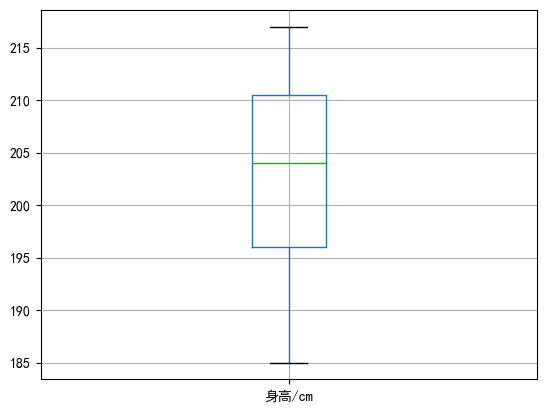

In [21]:
from matplotlib import pyplot as plt
# 在箱型图中设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
# 使用箱形图检测男篮运动员身高一列是否有异常值
male_data.boxplot(column=['身高/cm'])
plt.show()  #展示绘制的箱型图     通过图示可以看到男性身高信息中没有异常值

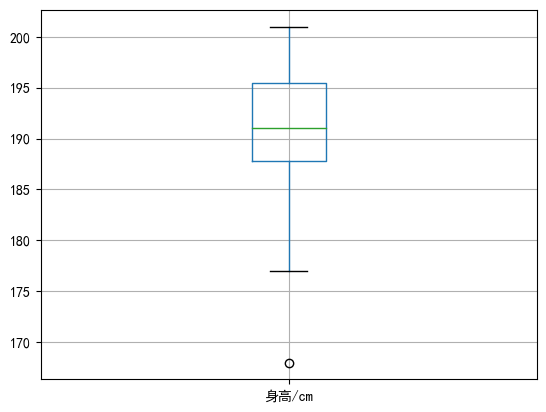

In [22]:
# 使用箱形图检测女篮运动员身高一列是否有异常值
female_data.boxplot(column=['身高/cm'])
plt.show()    

In [23]:
import numpy as np
import pandas as pd
# 定义基于3σ原则检测的函数
def three_sigma(ser): 
    # 计算平均数
    mean_data = ser.mean()
    # 计算标准差
    std_data = ser.std()
    # 根据数值小于μ-3σ或大于μ+3σ均为异常值
    rule = (mean_data-3*std_data>ser) | (mean_data+3*std_data<ser)
    # 返回异常值的位置索引
    index = np.arange(ser.shape[0])[rule]
    # 获取异常值数据
    outliers = ser.iloc[index]
    return outliers
# 使用3σ原则检测女篮运动员的体重数据
female_weight = basketball_data[basketball_data['性别'] == '女']
three_sigma(female_weight['体重/kg'])

249    103
Name: 体重/kg, dtype: int32

In [24]:
# 使用3σ原则检测男篮运动员的体重数据中的异常值
male_weight = basketball_data[basketball_data['性别'] == '男']
three_sigma(male_weight['体重/kg'])

Series([], Name: 体重/kg, dtype: int32)

### 实现分析目标
### 1.计算男性篮球运动员和女性篮球运动员平均身高和平均体重

In [25]:
# 以性别分组，对各分组执行求平均数操作，并要求平均数保留一位小数
basketball_data.groupby('性别').mean().round(1)

,身高/cm,体重/kg
性别,,
女,189.8,80.1
男,203.1,97.7


### 2.分析中国篮球运动员的年龄分布

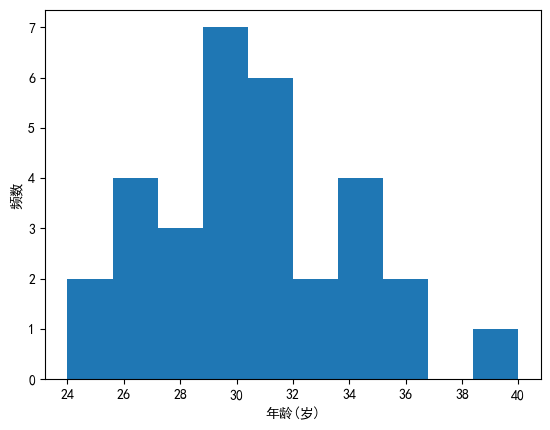

In [26]:
import matplotlib.pyplot as plt
# 设置图表中文字的字体为黑体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 根据出生日期计算年龄
ages = 2023 - basketball_data['出生日期'].apply(lambda x : x[0:-1]).astype(int)
# 根据计算的年龄值绘制直方图  设定参数kind为hist
ax = ages.plot(kind='hist')
# 设置直方图中x轴、y轴的标签为“年龄(岁)”和“频数”
ax.set_xlabel('年龄(岁)')
ax.set_ylabel('频数')
# 通过range函数设置x轴的刻度为“ages的最小值作开始, ages的最小值+2作间隔,ages最大值+1作结尾”
ax.set_xticks(range(ages.min(),ages.max()+1, 2))
plt.show()

### 3.计算篮球运动员的体质指数       体质指数 = 体重（kg）/（身高* 身高）（m）

In [27]:
# 增加“体质指数”一列    并使用0进行填充
basketball_data['体质指数'] = 0
basketball_data.head(5)

,中文名,外文名,性别,国籍,出生日期,身高/cm,体重/kg,项目,省份,体质指数
67,睢冉,Sui Ran,男,中国,1992年,192,95,篮球,山西太原,0
100,王哲林,Wang Zhelin,男,中国,1994年,214,110,篮球,福建,0
161,易建联,Yi Jianlian,男,中国,1987年,213,113,篮球,广东,0
182,周鹏,Zhou Peng,男,中国,1989年,206,90,篮球,辽宁,0
192,周琦,Zhou Qi,男,中国,1996年,217,95,篮球,河南新乡,0


In [28]:
# 计算体质指数函数
def ath_bmi(sum_bmi):
    weight = basketball_data['体重/kg']
    height = basketball_data['身高/cm'] 
    bmi =  weight / (height/100)**2    #此处需要将身高cm转换为米m
    return bmi

In [29]:
basketball_data['体质指数'] = basketball_data[['体质指数']].apply(ath_bmi).round(1)
basketball_data

,中文名,外文名,性别,国籍,出生日期,身高/cm,体重/kg,项目,省份,体质指数
67,睢冉,Sui Ran,男,中国,1992年,192,95,篮球,山西太原,25.8
100,王哲林,Wang Zhelin,男,中国,1994年,214,110,篮球,福建,24.0
161,易建联,Yi Jianlian,男,中国,1987年,213,113,篮球,广东,24.9
182,周鹏,Zhou Peng,男,中国,1989年,206,90,篮球,辽宁,21.2
192,周琦,Zhou Qi,男,中国,1996年,217,95,篮球,河南新乡,20.2
211,翟晓川,Zhai Xiaochuan,男,中国,1993年,204,100,篮球,河北唐山,24.0
213,赵继伟,Zhao Jiwei,男,中国,1995年,185,77,篮球,辽宁海城,22.5
214,邹雨宸,Zou yuchen,男,中国,1996年,208,108,篮球,辽宁大连,25.0
244,丁彦雨航,Di Yanyuhang,男,中国,1993年,200,91,篮球,新疆克拉玛依,22.8
276,郭艾伦,Guo Ailun,男,中国,1993年,192,85,篮球,辽宁,23.1


In [30]:
#判断男性篮球运动员和女性篮球运动员的体质指数是否在正常范围之内
groupby_obj = basketball_data.groupby(by="性别")    #使用groupby方式 按照性别进行分类
females = dict([x for x in groupby_obj])['女']['体质指数'].values  #获取女性篮球运动员的体质指数
# 统计体质指数为非正常的女篮运动员的数量
count = females[females < 19].size + females[females > 24].size   #size能获取非正常值的数量
print(f'体质指数小于19：{females[females < 19]}')    #获取体质指数小于19的值
print(f'体质指数大于24：{females[females > 24]}')    #获取体质指数大于24的值
print(f'非正常体质范围的总人数：{count}')   #获取体质指数异常的值的数量

体质指数小于19：[]
体质指数大于24：[28.3 25.5]
非正常体质范围的总人数：2


In [31]:
males = dict([x for x in groupby_obj])['男']['体质指数'].values
# 统计体质指数为非正常的男篮运动员的数量
count = males[males < 20].size + males[males > 25].size
print(f'体质指数小于20：{males[males < 20]}')
print(f'体质指数大于25：{males[males > 25]}')
print(f'非正常体质范围的总人数：{count}')

体质指数小于20：[]
体质指数大于25：[25.8 26.9]
非正常体质范围的总人数：2
